In [2]:
import pandas as pd               
import numpy as np                   
import matplotlib.pyplot as plt                     
import seaborn as sns   
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv(r"C:\Users\om420\Downloads\train.csv.zip")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


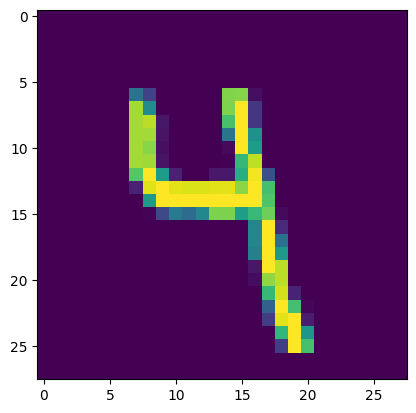

In [4]:
plt.imshow(df.iloc[29153,1:].values.reshape(28,28))

In [5]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
X_train.shape

(33600, 784)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [9]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [10]:
#checking how much time taken to run
import time            
start=time.time()
y_pred=knn.predict(X_test)
print(time.time()-start)

13.880005836486816


In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9648809523809524

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [13]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [14]:
#PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=784)
    

In [15]:
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [16]:
X_test_trf.shape

(8400, 784)

In [17]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [18]:
y_pred_trf=knn.predict(X_test_trf)

In [19]:
accuracy_score(y_test,y_pred_trf)

0.9391666666666667

In [20]:
for i in range(1,785):
    from sklearn.decomposition import PCA
    pca=PCA(n_components=i)
    X_train_trf=pca.fit_transform(X_train)
    X_test_trf=pca.transform(X_test)
    knn=KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred_trf=knn.predict(X_test_trf)
    print(accuracy_score(y_test,y_pred_trf)*100)

25.80952380952381
32.36904761904762
51.04761904761905
66.63095238095238
73.78571428571429
82.27380952380953
84.36904761904762
87.21428571428571
88.6547619047619
90.55952380952381
91.16666666666666
91.84523809523809
92.76190476190476
93.51190476190476
93.84523809523809
93.79761904761905
94.07142857142857
94.0
94.25
94.42857142857143
94.38095238095238
94.41666666666667
94.42857142857143
94.57142857142857
94.84523809523809
94.79761904761905
94.78571428571428
94.71428571428572
94.9047619047619
94.91666666666667
95.07142857142857
95.13095238095238
95.0
95.04761904761905
95.0952380952381


KeyboardInterrupt: 

In [21]:
pca=PCA(n_components=3)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [22]:
X_train_trf

array([[-2.71863253, -0.48982409,  1.1354966 ],
       [-0.67698015, -6.75362491, -2.33590139],
       [-3.03323281,  6.50981624,  7.49182983],
       ...,
       [ 2.14883643,  0.78079444, -0.74738774],
       [ 1.05957006,  0.94767312,  3.94973114],
       [17.70258446,  1.96188185, -4.94352837]])

In [23]:
import plotly.express as px
y_train_trf=y_train.astype(str)
fig=px.scatter_3d(x=X_train_trf[:,0],y=X_train_trf[:,1],z=X_train_trf[:,2],color=y_train_trf,color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

FINDING OPTIMUM NUMBER OF PRINCIPLE COMPONENTS


In [24]:
#eigen values
pca.explained_variance_

array([40.67111198, 29.17023401, 26.74459621])

In [25]:
pca.components_.shape

(3, 784)

In [26]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [27]:
pca=PCA(n_components=None)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [ ]:
np.cumsum(pca.explained_variance_ratio_)*100

array([  5.78519225,   9.93446193,  13.73870094,  16.70496371,
        19.2865254 ,  21.54150558,  23.5145736 ,  25.28985357,
        26.85850424,  28.29456752,  29.66482235,  30.89207736,
        32.03898935,  33.16201674,  34.22054559,  35.24047664,
        36.1981528 ,  37.14086161,  38.05335104,  38.94352123,
        39.78346173,  40.60352492,  41.38882815,  42.14556786,
        42.88282888,  43.58471353,  44.28263326,  44.95373775,
        45.59358278,  46.22392007,  46.83927092,  47.44165957,
        48.02533355,  48.6038813 ,  49.17621445,  49.72261423,
        50.2658216 ,  50.79399435,  51.30737609,  51.80139157,
        52.28906267,  52.77104144,  53.23924587,  53.69858836,
        54.15624919,  54.60546821,  55.05015043,  55.49169118,
        55.92680312,  56.35883605,  56.78064492,  57.19888804,
        57.60688239,  58.00888731,  58.40722316,  58.80182197,
        59.18869358,  59.57188877,  59.94844139,  60.32263485,
        60.68748701,  61.04828955,  61.402176  ,  61.75

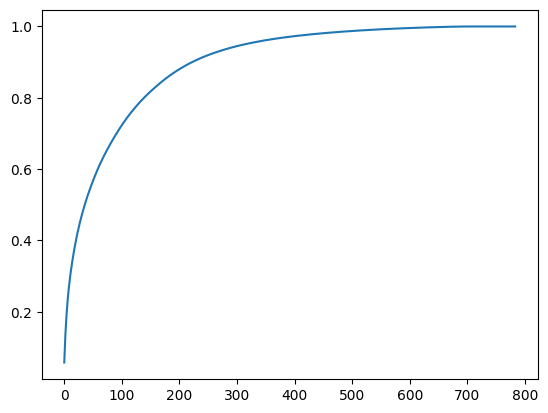

In [28]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

e:\Anaconda\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



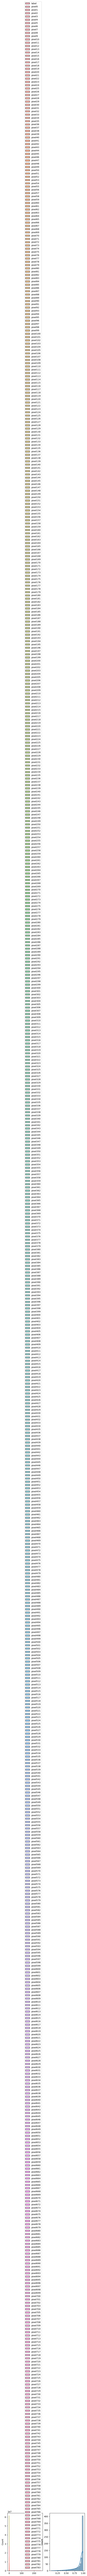

In [ ]:
plt.subplot(1,2,1)
sns.histplot(df,kde=True,bins=30)


plt.subplot(1,2,2)
sns.histplot(np.cumsum(pca.explained_variance_ratio_),kde=True,bins=30)
plt.show()